**Intialize** 

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
os.chdir(r"/home/miu/pros/acc")
df = pd.read_csv(r"lending.dat", encoding = "utf-8")
print(df)

            uid      bid                   title                  date
0          7185   344778               有氧健身走与跑入门  2012-10-25          
1          7185  1429750                  世界在你心中  2019-02-28          
2          7185   229134                    体能训练  2012-02-23          
3          7185   441399  欧洲中世纪史:a short history  2016-07-04          
4          7185   141446          中国书画名家画语图解.王羲之  2012-10-25          
...         ...      ...                     ...                   ...
400107  1084420  1625325        格列佛游记:插图·中文导读英文版  2016-03-30          
400108    14690    24920                如何做心理学实验  2015-07-10          
400109    14690    24920                如何做心理学实验  2016-04-12          
400110  1084420   132513                    吕氏春秋  2017-06-28          
400111  1084420   386536           希腊神话故事六则:英汉对照  2015-11-15          

[400112 rows x 4 columns]


In [2]:
def cutYear(s):
    s = str(s)
    s = s[0:4]
    return s

def cutMonth(s):
    s = str(s)
    s = s[5:7]
    return s

df['year'] = df['date'].apply(cutYear)
df['month'] = df['date'].apply(cutMonth)

**按年份** 

In [3]:
df1 = df[["year"]].groupby(df["year"]).count()

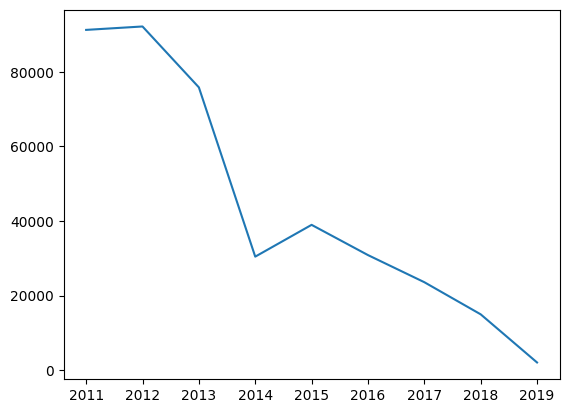

In [4]:
## 线形图
plt.plot(df1)

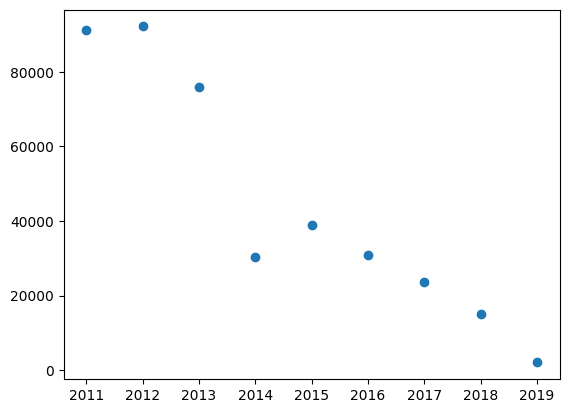

In [5]:
## 散点图
plt.scatter(df1.index, df1['year'])

<BarContainer object of 9 artists>

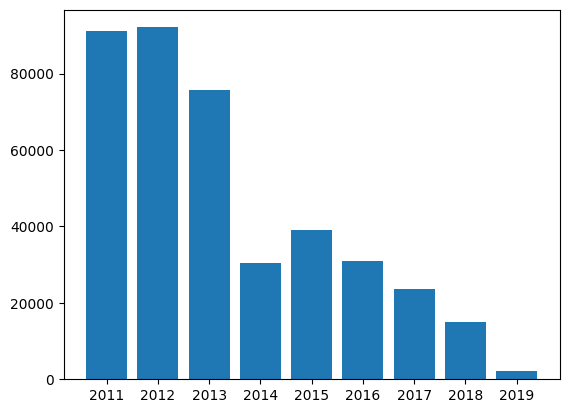

In [6]:
## 柱状图
plt.bar(df1.index, df1['year'])

**按月份** 

In [7]:
df2 = df[["month"]].groupby(df["month"]).count()

<BarContainer object of 12 artists>

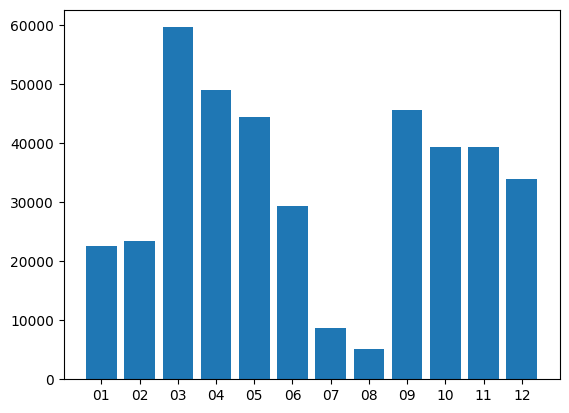

In [8]:
## 柱状图
plt.bar(df2.index, df2['month'])

**绘制2011年的月度变化**

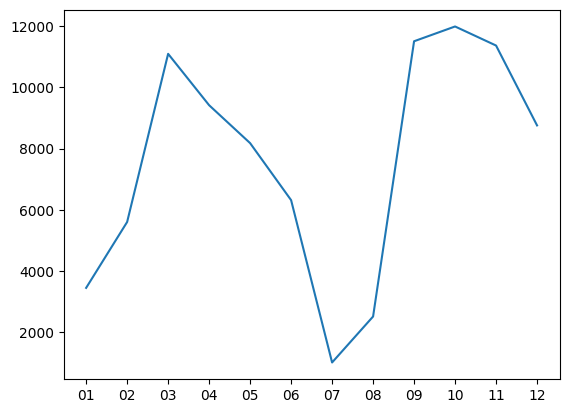

In [9]:
df_2011 = df[df['year'] == '2011']
df_2011 = df_2011[["month"]].groupby(df_2011["month"]).count()
plt.plot(df_2011)

**绘制所有年份的月度变化** 

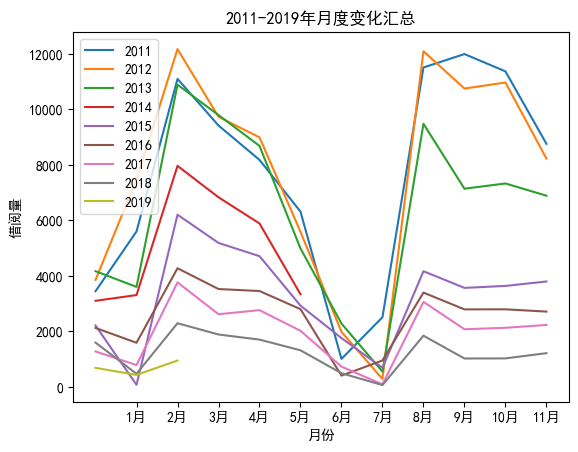

In [10]:
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.title("2011-2019年月度变化汇总")
plt.xlabel("月份")
plt.ylabel("借阅量")
mon = [f'{i}月' for i in range(1, 13)]
trueMon = range(1, 13)
plt.xticks(trueMon, mon)

## 数据
for i in range(2011, 2020):
    dfTemp = df[df['year'] == str(i)]
    dfTemp = dfTemp[["month"]].groupby(dfTemp["month"]).count()
    plt.plot(dfTemp, label = str(i))
plt.legend(loc = 2)